# PROBLEM STATEMENT

Implement a ML model on a real world scenario by assuming that Rahul own an online clothing business and he would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. 

## LIBRARIES IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Tshirt = pd.read_csv("Tshirt_Sizing_Dataset.csv")
Tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [4]:
Tshirt.tail()

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


In [5]:
Tshirt.shape

(18, 3)

## EXPLORE / VISUALIZE DATASET

In [6]:
Large = Tshirt[Tshirt['T Shirt Size']=='L']
Small = Tshirt[Tshirt['T Shirt Size']=='S']
print("No of Large Sample = ", len(Large))
print("No of Small Sample = ", len(Small))

No of Large Sample =  11
No of Small Sample =  7


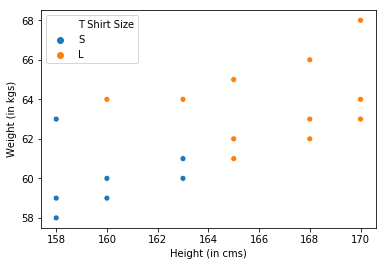

In [7]:
#ScatterPlot to Visualize the data and to illustrate the trend
sns.scatterplot(Tshirt['Height (in cms)'],Tshirt['Weight (in kgs)'],hue=Tshirt['T Shirt Size'])

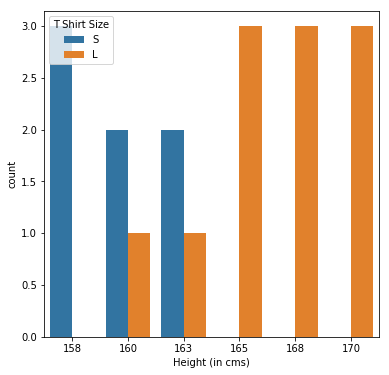

In [8]:
#Bar chart to indicate the TShirt Size as per the Height 
plt.figure(figsize = [6,6])
sns.countplot(x='Height (in cms)',hue='T Shirt Size',data = Tshirt)

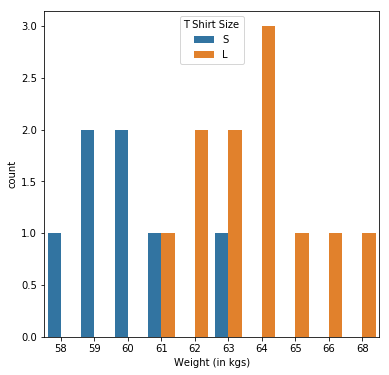

In [9]:
#Bar chart to indicate the TShirt Size as per the Weight
plt.figure(figsize = [6,6])
sns.countplot(x='Weight (in kgs)',hue='T Shirt Size',data = Tshirt)

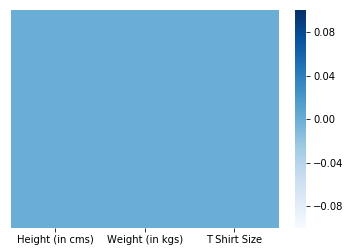

In [10]:
# Explore any missing value
# Dataset has no missing value
sns.heatmap(Tshirt.isnull(),yticklabels = False, cbar = True, cmap = "Blues")

## CREATE TESTING AND TRAINING DATASET

In [27]:
X = Tshirt.iloc[:, :2].values
y = Tshirt.iloc[:, 2].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## MODEL TRAINING

In [16]:
# Fitting KNN to the Training Set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## MODEL TESTING

In [17]:
y_pred_train = classifier.predict(X_train)
print(y_pred_train)

[1 0 1 1 1 0 0 0 0 0 0 1 1]


[[7 1]
 [0 5]]


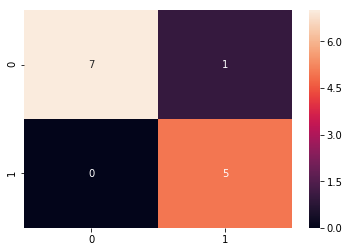

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

In [19]:
y_pred_test = classifier.predict(X_test)
print(y_pred_test)

[0 1 0 0 1]


[[3 0]
 [0 2]]


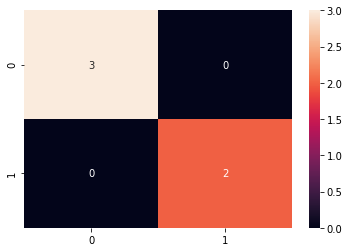

In [20]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



## VISUALIZE TRAINING SET RESULTS 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


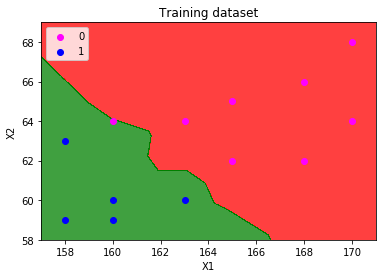

In [22]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


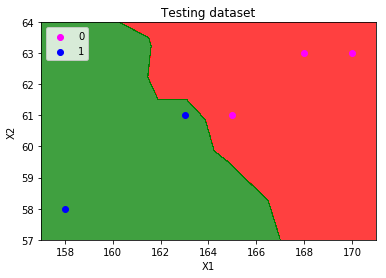

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
   
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [26]:
X = np.array([[158, 58]])

y_predict = classifier.predict(X)

y_predict

array([1])